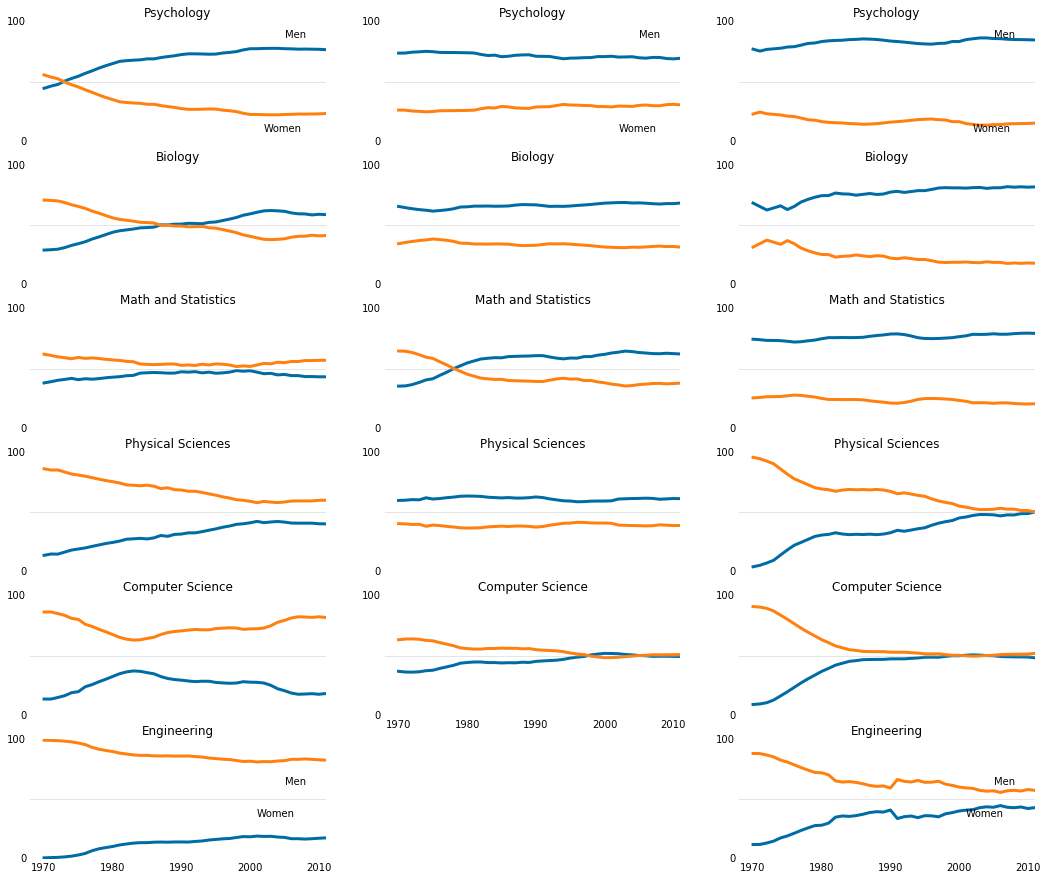

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV values into a Pandas DataFrame
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

# set tuples for colors from Color Blind 10 palette
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

# major categories
stem_cats = ['Psychology', 
             'Biology', 
             'Math and Statistics', 
             'Physical Sciences', 
             'Computer Science', 
             'Engineering']
lib_arts_cats = ['Foreign Languages', 
                 'English', 
                 'Communications and Journalism', 
                 'Art and Performance', 
                 'Social Sciences and History']
other_cats = ['Health Professions', 
              'Public Administration', 
              'Education', 
              'Agriculture',
              'Business', 
              'Architecture']

# put category lists into a list corresponding to the columns we'll display
cat_cols = [stem_cats, lib_arts_cats, other_cats]

# create a matplotlib Figure to which we'll add subplots
fig = plt.figure(figsize=(18, 15))

for col in range(3):
    cats = cat_cols[col]
    for row in range(6):
        plot_number = (row * 3) + col + 1
        if plot_number != 17:
            ax = fig.add_subplot(6, 3, plot_number)
            ax.plot(women_degrees['Year'], 
                    women_degrees[cats[row]], 
                    c=cb_dark_blue, 
                    label='Women', 
                    linewidth=3)
            ax.plot(women_degrees['Year'], 
                    100-women_degrees[cats[row]], 
                    c=cb_orange, 
                    label='Men', 
                    linewidth=3)
            ax.spines["right"].set_visible(False)    
            ax.spines["left"].set_visible(False)
            ax.spines["top"].set_visible(False)    
            ax.spines["bottom"].set_visible(False)
            ax.set_xlim(1968, 2011)
            ax.set_ylim(0,100)
            ax.set_title(stem_cats[row])
            
            # remove the axis ticks
            ax.tick_params(bottom="off", 
                           top="off", 
                           left="off", 
                           right="off")

            # use only the range limits for the Y-axis
            ax.set_yticks([0,100])
            
            # remove the bottom label unless it's the last plot in the column
            if row != len(cats) - 1:
                ax.tick_params(labelbottom='off')
                
            # add a faint horizontal line at the 50% level 
            ax.axhline(50, 
                       c=(171/255, 171/255, 171/255), 
                       alpha=0.3)

            # annotate the top and bottom plots of each column with labels on the lines
            if row == 0:
                ax.text(2005, 87, 'Men')
                ax.text(2002, 8, 'Women')
            elif row == 5:
                ax.text(2005, 62, 'Men')
                ax.text(2001, 35, 'Women')
                
# export the figure as an image file
plt.savefig('gender_degrees.png')

# display the figure
plt.show()